# Evaluation Baseline/one dataset

In [ ]:
# dependecies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [856]:
# Training with Urdu
train_engger = pd.read_csv(r'multilingual_english_and_german.csv')
train_engita = pd.read_csv(r'multilingual_english_and_italian.csv')
train_gerita = pd.read_csv(r'multilingual_german_and_italian.csv')
train_western = pd.read_csv(r'multilingual_western.csv')

# Baseline Urdu for comparison
baseline_urdu = pd.read_csv(r'..\Baseline\urdu_results.csv')

In [857]:
# Melt the DataFrame to long format for easier plotting
train_engger = train_engger.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_engita = train_engita.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_gerita = train_gerita.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_western = train_western.melt(id_vars="Model", var_name="Metric", value_name="Score")

In [858]:
# Define dataset names
names = ['English and German', 'English and Italian', 'German and Italian', 'English, German and Italian', 'Urdu']

# combine dataframes
df_multilingual = [train_engger, train_engita, train_gerita, train_western, baseline_urdu]
combined_dfs = pd.concat(
        [df.assign(Dataset=name) for df, name in zip(df_multilingual, names)],
        ignore_index=True
    )

In [859]:
# plot
def plot_results(df, title):
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")

    sns.barplot(x="Metric", y="Score", hue="Model", data=df, palette="viridis")
    plt.title(title)
    plt.xlabel("Model", fontsize = 12)
    plt.ylabel("Score", fontsize = 12)
    plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [860]:
def plot_multilingual_vs_urdu(df_multilingual, datasets, title):

    scores = [df_multilingual[df_multilingual['Dataset'] == ds]['Score'].values[0] * 100 for ds in datasets]

    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    ax = sns.barplot(x="Dataset", y=scores, hue="Dataset", data=df_multilingual, palette="viridis")

    plt.title(title)
    plt.xlabel("Dataset", fontsize = 12)
    plt.ylabel("Accuracy (%)", fontsize = 12)
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.2f}",  # Format score as 2 decimal places
            (p.get_x() + p.get_width() / 2, p.get_height()),  # Center the label
            ha='center',  # Center horizontally
            va='bottom',  # Place text slightly above bar
            fontsize=10,
            color='black'
        )
    plt.tight_layout()
    plt.show()

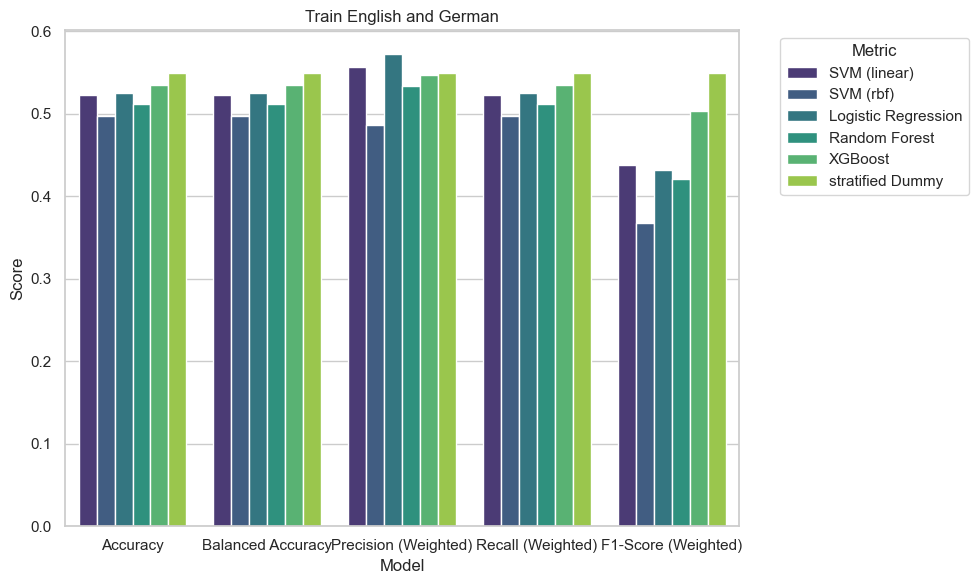

In [861]:
plot_results(train_engger, "Train English and German")

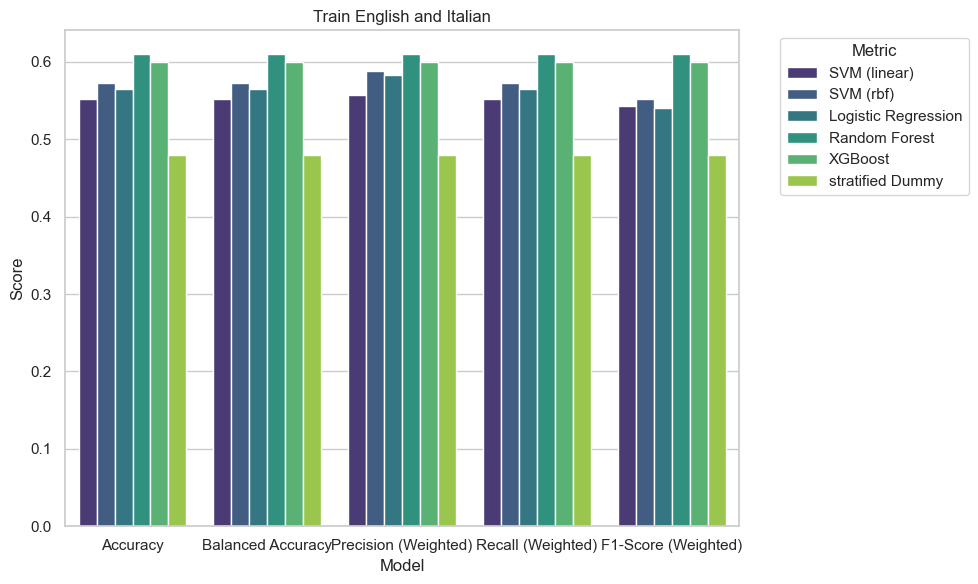

In [862]:
plot_results(train_engita, "Train English and Italian")

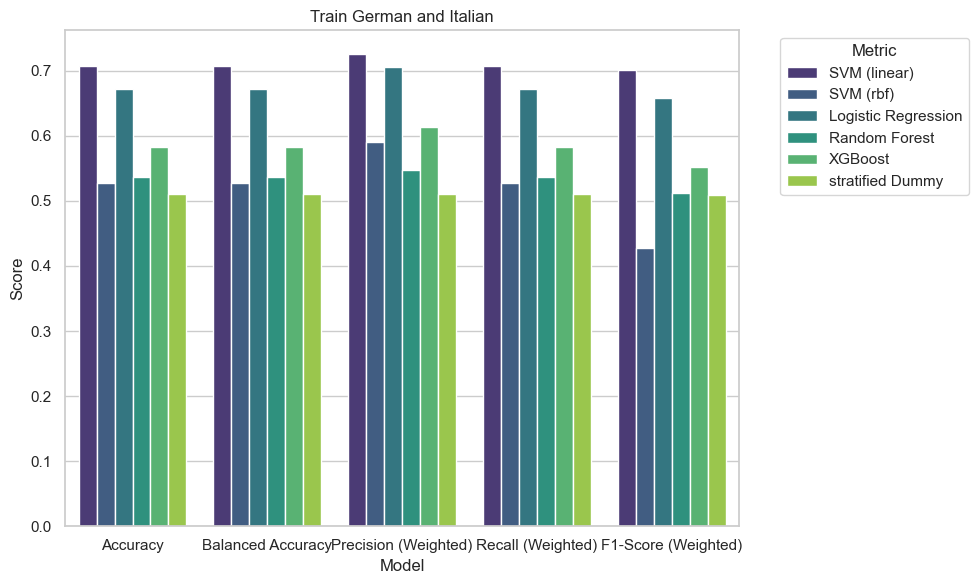

In [863]:
plot_results(train_gerita, "Train German and Italian")

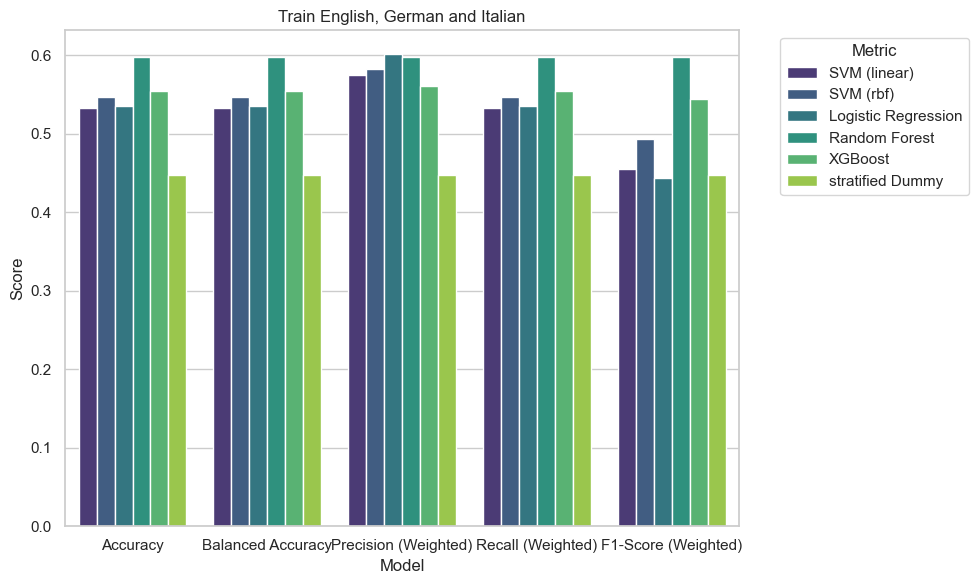

In [864]:
plot_results(train_western, "Train English, German and Italian")

In [865]:
# Replicate plot from the paper

# testing with urdu
df_multilingual_accuracy = combined_dfs[((combined_dfs["Metric"] == "Balanced Accuracy") | (combined_dfs["Metric"] == "balanced_accuracy")) & (combined_dfs["Model"] == "XGBoost")]

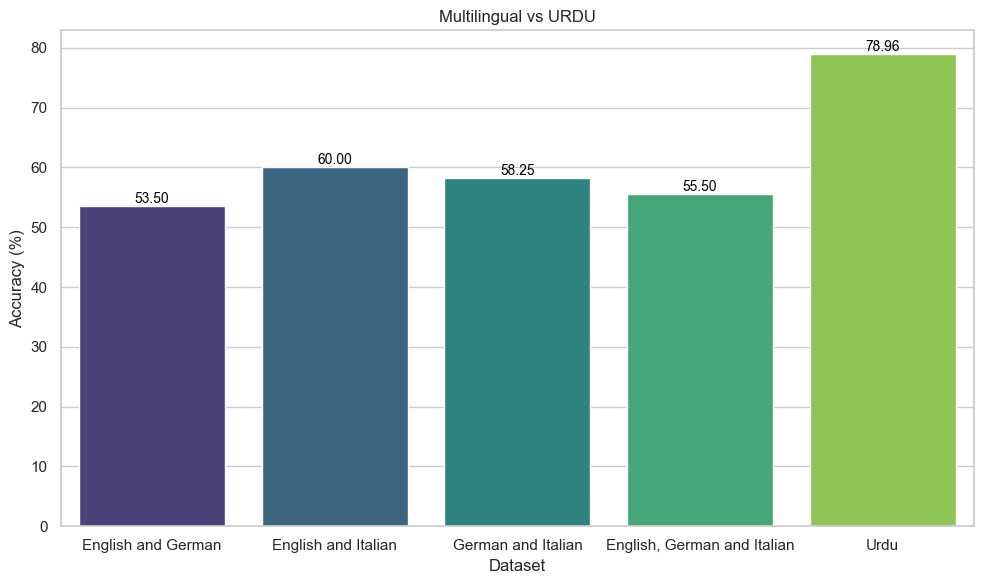

In [866]:
plot_multilingual_vs_urdu(df_multilingual=df_multilingual_accuracy, datasets=names, title="Multilingual vs URDU")